In [1]:
import numpy as np
from fashion_mnist_dataset.utils import mnist_reader
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load datasets
X_train_mnist, y_train_mnist = mnist_reader.load_mnist('fashion_mnist_dataset/data/fashion', kind='train')
X_test_mnist, y_test_mnist = mnist_reader.load_mnist('fashion_mnist_dataset/data/fashion', kind='t10k')


# Train data for tshirt(0) and boot(9)
X_train_tshirt_boot = np.array([image for image, label in zip(X_train_mnist, y_train_mnist) if label == 0 or label == 9])
y_train_tshirt_boot = np.array([0 if label == 0 else 1 for image, label in zip(X_train_mnist, y_train_mnist) if label == 0 or label == 9])

X_test_tshirt_boot = np.array([image for image, label in zip(X_test_mnist, y_test_mnist) if label == 0 or label == 9])
y_test_tshirt_boot = np.array([0 if label == 0 else 1 for image, label in zip(X_test_mnist, y_test_mnist) if label == 0 or label == 9],dtype='f')

# Train data for pullover(2) and coat(4)
X_train_pullover_coat = np.array([image for image, label in zip(X_train_mnist, y_train_mnist) if label == 2 or label == 4])
y_train_pullover_coat = np.array([0 if label == 2 else 1 for image, label in zip(X_train_mnist, y_train_mnist) if label == 2 or label == 4])

X_test_pullover_coat = np.array([image for image, label in zip(X_test_mnist, y_test_mnist) if label == 2 or label == 4])
y_test_pullover_coat = np.array([0 if label == 2 else 1 for image, label in zip(X_test_mnist, y_test_mnist) if label == 2 or label == 5])



# Train data for all classes
X_train_all_class = X_train_mnist
y_train_all_class = y_train_mnist





In [2]:
# Shuffle
shuffled_indices = np.random.permutation(len(X_train_tshirt_boot))
X_train_tshirt_boot = X_train_tshirt_boot[shuffled_indices]
y_train_tshirt_boot = y_train_tshirt_boot[shuffled_indices].reshape(-1,1)




shuffled_indices = np.random.permutation(len(X_test_tshirt_boot))
X_test_tshirt_boot = X_test_tshirt_boot[shuffled_indices]
y_test_tshirt_boot = y_test_tshirt_boot[shuffled_indices].reshape(-1, 1)



shuffled_indices = np.random.permutation(len(X_train_pullover_coat))
X_train_pullover_coat = X_train_pullover_coat[shuffled_indices]
y_train_pullover_coat = y_train_pullover_coat[shuffled_indices].reshape(-1,1)


shuffled_indices = np.random.permutation(len(X_test_pullover_coat))
X_test_pullover_coat = X_test_pullover_coat[shuffled_indices]
y_test_pullover_coat = y_test_pullover_coat[shuffled_indices].reshape(-1, 1)

print("X train dim:",X_train_tshirt_boot.shape,X_train_pullover_coat.shape)
print("X test dim:",X_test_tshirt_boot.shape,X_test_pullover_coat.shape)

print("Y train dim:",y_train_tshirt_boot.shape,y_train_pullover_coat.shape)
print("Y test dim:",y_test_tshirt_boot.shape,y_test_pullover_coat.shape)




X train dim: (12000, 784) (12000, 784)
X test dim: (2000, 784) (2000, 784)
Y train dim: (12000, 1) (12000, 1)
Y test dim: (2000, 1) (2000, 1)


In [3]:
# Normalization
def matrix_norm(mat):
    mat_t = mat.T
    for i in range(mat_t.shape[0]):
        
        ma = max(mat_t[i])
        mi = min(mat_t[i])
        interval = ma - mi
        if ma-mi == 0:
            continue
        else:
            mat_t[i] = np.true_divide(mat_t[i]-mi, ma-mi)
    return mat_t.T


X_train_tshirt_boot = np.array(matrix_norm(np.array(X_train_tshirt_boot,dtype='f')),dtype = 'f')
X_test_tshirt_boot = np.array(matrix_norm(np.array(X_test_tshirt_boot,dtype='f')),dtype='f')

X_train_pullover_coat = np.array(matrix_norm(np.array(X_train_pullover_coat,dtype='f')),dtype = 'f')
X_test_pullover_coat = np.array(matrix_norm(np.array(X_test_pullover_coat,dtype='f')),dtype = 'f')


X_train_all_class = np.array(matrix_norm(np.array(X_train_all_class,dtype='f')),dtype = 'f')







print("X train dim:",X_train_tshirt_boot.shape,X_train_pullover_coat.shape)
print("X test dim:",X_test_tshirt_boot.shape,X_test_pullover_coat.shape)

print("Y train dim:",y_train_tshirt_boot.shape,y_train_pullover_coat.shape)
print("Y test dim:",y_test_tshirt_boot.shape,y_test_pullover_coat.shape)



X train dim: (12000, 784) (12000, 784)
X test dim: (2000, 784) (2000, 784)
Y train dim: (12000, 1) (12000, 1)
Y test dim: (2000, 1) (2000, 1)


In [4]:
# Principal component analysis (PCA)
def pca(A):
    mean = np.mean(A, axis = 0)
    centered = A - mean
    covariance_matrix = np.cov(centered.T)
    eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)
    
    return np.fliplr(eigen_vectors)

pc_tshirt_boot = pca(X_train_tshirt_boot)
pc_pullover_coat = pca(X_train_pullover_coat)
pc_all_class = pca(X_train_all_class)

print("tshirt boot pc:",pc_tshirt_boot.shape)

tshirt boot pc: (784, 784)


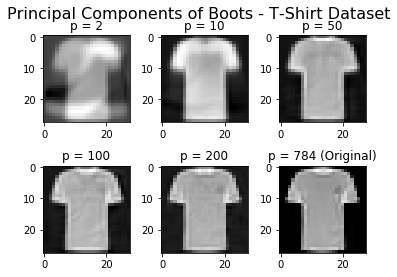

In [5]:
# Visualize PCs
sample_image = X_train_tshirt_boot[np.random.choice(len(X_train_tshirt_boot)), :]

pc_tshirt_boot_2 = (sample_image @ pc_tshirt_boot[:, :2] @ pc_tshirt_boot[:, :2].T)
pc_tshirt_boot_10 = (sample_image @ pc_tshirt_boot[:, :10] @ pc_tshirt_boot[:, :10].T)
pc_tshirt_boot_50 = (sample_image @ pc_tshirt_boot[:, :50] @ pc_tshirt_boot[:, :50].T)
pc_tshirt_boot_100 = (sample_image @ pc_tshirt_boot[:, :100] @ pc_tshirt_boot[:, :100].T)
pc_tshirt_boot_200 = (sample_image @ pc_tshirt_boot[:, :200] @ pc_tshirt_boot[:, :200].T)
pc_tshirt_boot_784 = (sample_image @ pc_tshirt_boot[:, :784] @ pc_tshirt_boot[:, :784].T)

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('Principal Components of Boots - T-Shirt Dataset', fontsize = 16)
axs[0, 0].set_title('p = 2')
axs[0, 0].imshow(pc_tshirt_boot_2.reshape((28, 28)), cmap='gray')
axs[0, 1].set_title('p = 10')
axs[0, 1].imshow(pc_tshirt_boot_10.reshape((28, 28)), cmap='gray')
axs[0, 2].set_title('p = 50')
axs[0, 2].imshow(pc_tshirt_boot_50.reshape((28, 28)), cmap='gray')
axs[1, 0].set_title('p = 100')
axs[1, 0].imshow(pc_tshirt_boot_100.reshape((28, 28)), cmap='gray')
axs[1, 1].set_title('p = 200')
axs[1, 1].imshow(pc_tshirt_boot_200.reshape((28, 28)), cmap='gray')
axs[1, 2].set_title('p = 784 (Original)')
axs[1, 2].imshow(pc_tshirt_boot_784.reshape((28, 28)), cmap='gray')

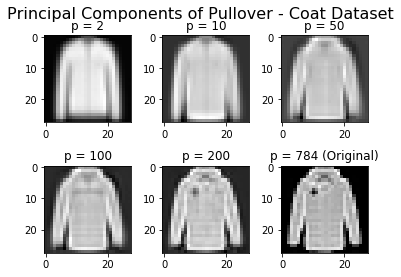

In [6]:
# Visualize PCs
sample_image = X_train_pullover_coat[np.random.choice(len(X_train_tshirt_boot)), :]

pc_pullover_coat_2 = (sample_image @ pc_pullover_coat[:, :2] @ pc_pullover_coat[:, :2].T)
pc_pullover_coat_10 = (sample_image @ pc_pullover_coat[:, :10] @ pc_pullover_coat[:, :10].T)
pc_pullover_coat_50 = (sample_image @ pc_pullover_coat[:, :50] @ pc_pullover_coat[:, :50].T)
pc_pullover_coat_100 = (sample_image @ pc_pullover_coat[:, :100] @ pc_pullover_coat[:, :100].T)
pc_pullover_coat_200 = (sample_image @ pc_pullover_coat[:, :200] @ pc_pullover_coat[:, :200].T)
pc_pullover_coat_784 = (sample_image @ pc_pullover_coat[:, :784] @ pc_pullover_coat[:, :784].T)

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('Principal Components of Pullover - Coat Dataset', fontsize = 16)
axs[0, 0].set_title('p = 2')
axs[0, 0].imshow(pc_pullover_coat_2.reshape((28, 28)), cmap='gray')
axs[0, 1].set_title('p = 10')
axs[0, 1].imshow(pc_pullover_coat_10.reshape((28, 28)), cmap='gray')
axs[0, 2].set_title('p = 50')
axs[0, 2].imshow(pc_pullover_coat_50.reshape((28, 28)), cmap='gray')
axs[1, 0].set_title('p = 100')
axs[1, 0].imshow(pc_pullover_coat_100.reshape((28, 28)), cmap='gray')
axs[1, 1].set_title('p = 200')
axs[1, 1].imshow(pc_pullover_coat_200.reshape((28, 28)), cmap='gray')
axs[1, 2].set_title('p = 784 (Original)')
axs[1, 2].imshow(pc_pullover_coat_784.reshape((28, 28)), cmap='gray')

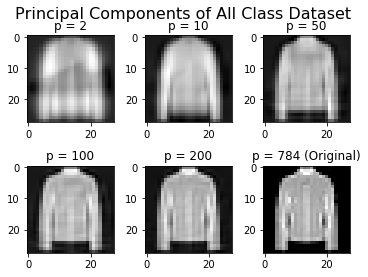

In [7]:
sample_image = X_train_all_class[np.random.choice(len(X_train_all_class)), :]

pc_all_class_2 = (sample_image @ pc_all_class[:, :2] @ pc_all_class[:, :2].T)
pc_all_class_10 = (sample_image @ pc_all_class[:, :10] @ pc_all_class[:, :10].T)
pc_all_class_50 = (sample_image @ pc_all_class[:, :50] @ pc_all_class[:, :50].T)
pc_all_class_100 = (sample_image @ pc_all_class[:, :100] @ pc_all_class[:, :100].T)
pc_all_class_200 = (sample_image @ pc_all_class[:, :200] @ pc_all_class[:, :200].T)
pc_all_class_784 = (sample_image @ pc_all_class[:, :784] @ pc_all_class[:, :784].T)

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('Principal Components of All Class Dataset', fontsize = 16)
axs[0, 0].set_title('p = 2')
axs[0, 0].imshow(pc_all_class_2.reshape((28, 28)), cmap='gray')
axs[0, 1].set_title('p = 10')
axs[0, 1].imshow(pc_all_class_10.reshape((28, 28)), cmap='gray')
axs[0, 2].set_title('p = 50')
axs[0, 2].imshow(pc_all_class_50.reshape((28, 28)), cmap='gray')
axs[1, 0].set_title('p = 100')
axs[1, 0].imshow(pc_all_class_100.reshape((28, 28)), cmap='gray')
axs[1, 1].set_title('p = 200')
axs[1, 1].imshow(pc_all_class_200.reshape((28, 28)), cmap='gray')
axs[1, 2].set_title('p = 784 (Original)')
axs[1, 2].imshow(pc_all_class_784.reshape((28, 28)), cmap='gray')

In [8]:
def sigmoid(x):
    return 1/(1 + np.exp(-1*x))
    
def x_w(x,w):
    # X should 1 * n , w should be n * 1
    return np.dot(x,w)

def predict(x,w):
    # X should be 1 * n, w should be n * 1 
    return sigmoid(x_w(x,w))

def loss(Y_train,X_train,w):
    # Y_train is n * k, n is batch size, k is number of feature, w is k * 1
    sum = 0
    
    # Calculate all y_hat in a batch in matrix n * k 
    Y_predict = predict(X_train,w)
    
    # E = -1 * sum from 1 to N ( y^n * log(y_hat^n) + (1-y^n)*log(1-y_hat^n))
    part1 = np.dot(Y_train.T,np.log(Y_predict+0.0001))
    One_minus_Y_train = 1 - Y_train
    part2 = np.dot(One_minus_Y_train.T,np.log(1-Y_predict+0.0001))
    return -1*(part1+part2)


def loss_gradient(Y_train,w,X_train):
    diff = Y_train - predict(X_train,w)
    gradient = np.dot(X_train.transpose(),diff)
    return (-1)*gradient



    
def prediction(x,w):
    y = predict(x,w)
    for i in range(len(y)):
        if y[i] > 0.5:
            y[i] = 1
        else:
            y[i] = 0
    return y

In [9]:
#training 
def batch(X_train,Y_train,num_batch,index):
    #可以做不均匀batch
    X_folds = np.vsplit(X_train,num_batch)
    Y_folds = np.split(Y_train,num_batch)
    #print("X_train is a list, size: ",len(X_folds),"with each element of shape: ",X_folds[0].shape,"\nY_train is a list, size: ",len(Y_folds),'with each element of shape:',Y_folds[0].shape)
    X_val_set = X_folds[index]
    Y_val_set = Y_folds[index]
    X_train_set = [X_folds[i] for i in range(len(X_folds)) if i != index]
    Y_train_set = [Y_folds[i] for i in range(len(Y_folds)) if i != index]

    return X_train_set,Y_train_set,X_val_set,Y_val_set
    

p = 400

print(X_train_tshirt_boot.shape)

# Perform PCA to every X_train batch
X_train_tshirt_boot_pc = X_train_tshirt_boot @ pc_tshirt_boot[:,:p]
X_test_tshirt_boot_pc = X_test_tshirt_boot @ pc_tshirt_boot[:,:p] 



(12000, 784)


In [14]:
trya = X_test_tshirt_boot_pc @ pc_tshirt_boot[:,:p].T
print(X_train_tshirt_boot_pc.shape)


(12000, 400)


In [32]:
w = np.zeros((p,1))

learning_rate = 0.01
num_batch = 10
epoch = 10

for i in range(num_batch):
    X_train_set,Y_train_set,X_val_set,Y_val_set = batch(X_train_tshirt_boot_pc,y_train_tshirt_boot,num_batch,i)
    
    #print("batch number:",i)
    for trial in range(epoch):
        shuffled_indices = [0,1,2,3,4,5,6,7,8]#np.random.permutation(len(X_train_set))
        for j in shuffled_indices:
        
            w = w - learning_rate * loss_gradient(Y_train_set[j],w,X_train_set[j])
        
            if loss(Y_train_set[j],X_train_set[j],w) < 5: 
                break
        Y = prediction(X_val_set,w)
        
        n = len(X_val_set)
        count = 0
        for k in range(len(Y_val_set)):
            if Y[k] == Y_val_set[k]:
                count = count + 1
        #print("accurary: ",count/n)
            
print(y_test_tshirt_boot.shape)
Y = prediction(X_test_tshirt_boot_pc,w)
n = len(y_test_tshirt_boot)
count = 0
for k in range(n):
    if Y[k] == y_test_[k]:
        count = count + 1
# print("final accurary: ",count/n)

(2000, 1)
